# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Q2. Load the dataset

In [4]:
df = pd.read_csv("C:\\Users\\sadiy\\Downloads\\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Q5. Handle missing values 

In [3]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df = df.drop(columns=['deck'])
df.head()

#since 688 entries out of total 891 are null, hence it is dropped

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df['age'].fillna(np.ceil(df['age'].mean()),inplace=True)

In [8]:
df['age'].isna().any()

False

In [9]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [10]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df.isna().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town     True
alive          False
alone          False
dtype: bool

In [11]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df.isna().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool

# Q3. Perform visualisations



## Univariate Analysis



C:\Users\sadiy\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution plot')

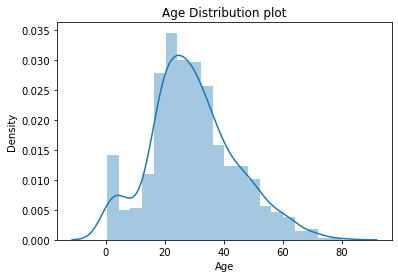

In [8]:
sns.distplot(df['Age'])
plt.xlabel("Age")
plt.title("Age Distribution plot")

([<matplotlib.patches.Wedge at 0x2084ae10df0>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

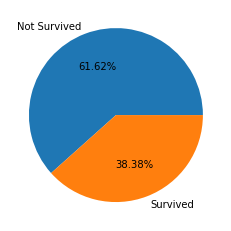

In [11]:
plt.pie(df['Survived'].value_counts(),labels=['Not Survived','Survived'],autopct="%.2f%%")



## Bivariate Analysis



<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

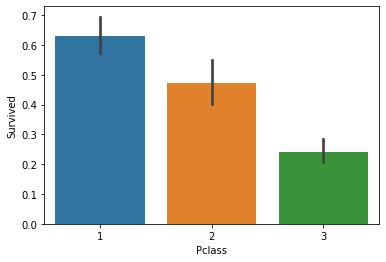

In [13]:
sns.barplot(data=df,x='Pclass',y='Survived')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

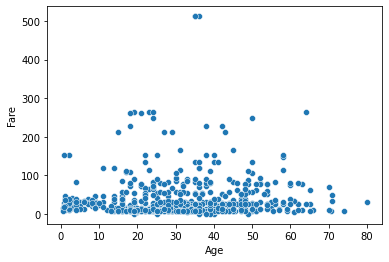

In [14]:
sns.scatterplot(data=df, x='Age', y='Fare')

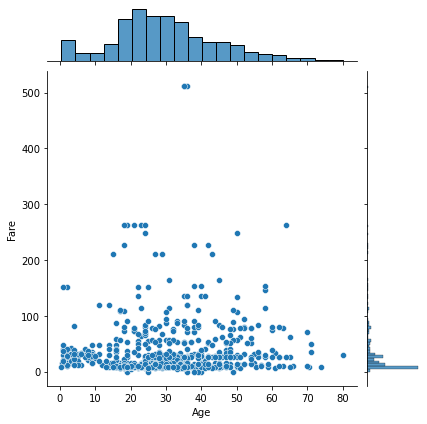

In [15]:
sns.jointplot(data=df,x='Age',y='Fare')



## Multivariate Analysis



<AxesSubplot:>

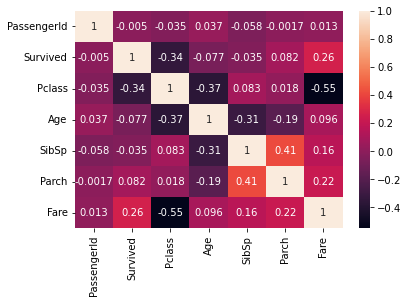

In [16]:
sns.heatmap(df.corr(),annot=True)

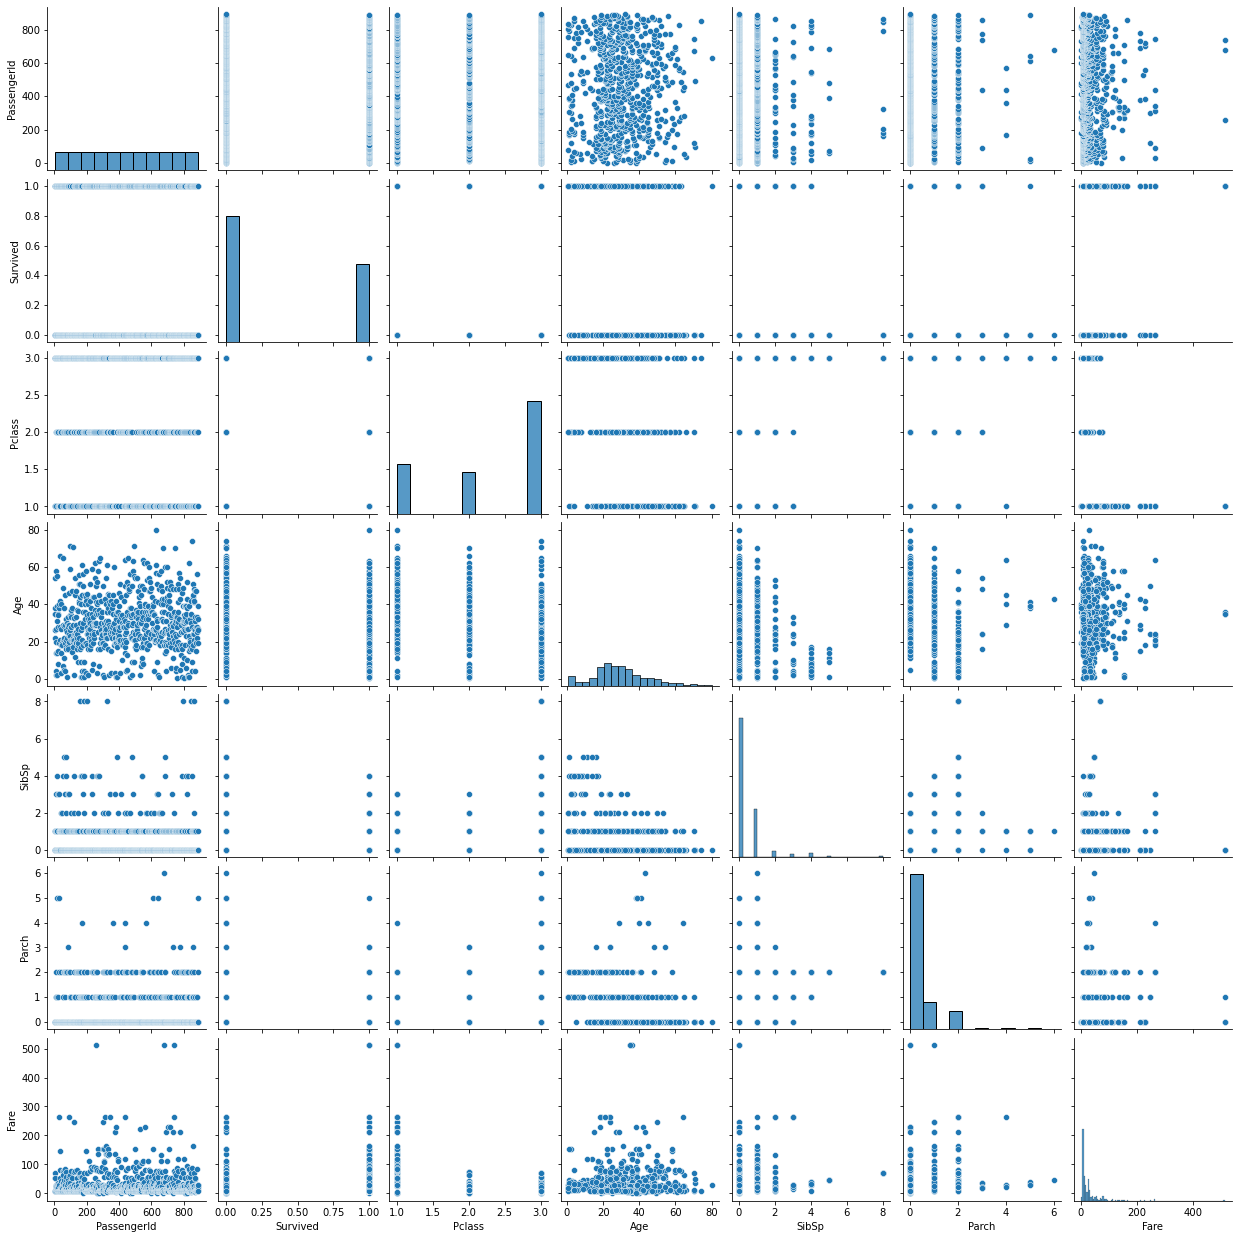

In [17]:
sns.pairplot(df)

# Q4. Perform descriptive statistics on dataset

In [26]:
df1 = df.drop(columns=['Sex','Pclass','Embarked','Name','Ticket','Cabin','PassengerId'])
df1.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [27]:
df1.mean()

Survived     0.383838
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [28]:
df1.median()

Survived     0.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

In [29]:
df.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df1.max()

Survived      1.0000
Age          80.0000
SibSp         8.0000
Parch         6.0000
Fare        512.3292
dtype: float64

In [32]:
df1.min()

Survived    0.00
Age         0.42
SibSp       0.00
Parch       0.00
Fare        0.00
dtype: float64

In [33]:
df1.var()

Survived       0.236772
Age          211.019125
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
dtype: float64

In [34]:
df1.std()

Survived     0.486592
Age         14.526497
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64

In [35]:
quantile = df1.quantile(q=[0.25,0.75])
quantile

,Survived,Age,SibSp,Parch,Fare
0.25,0.0,20.125,0.0,0.0,7.9104
0.75,1.0,38.000,1.0,0.0,31.0000


In [36]:
IQR = quantile.iloc[1]-quantile.iloc[0]

In [37]:
upper_extreme = quantile.iloc[1]+(1.5*IQR)
upper_extreme

Survived     2.5000
Age         64.8125
SibSp        2.5000
Parch        0.0000
Fare        65.6344
dtype: float64

In [38]:
lower_extreme = quantile.iloc[0]-(1.5*IQR)
lower_extreme

Survived    -1.5000
Age         -6.6875
SibSp       -1.5000
Parch        0.0000
Fare       -26.7240
dtype: float64

In [39]:
df1.skew()

Survived    0.478523
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [40]:
df1.kurt()

Survived    -1.775005
Age          0.178274
SibSp       17.880420
Parch        9.778125
Fare        33.398141
dtype: float64

In [41]:
df1.corr()

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.096067,0.159651,0.216225,1.000000


In [43]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Q6. Find and replace outliers

C:\Users\sadiy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

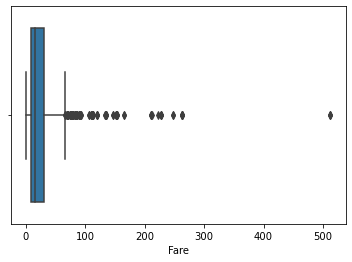

In [44]:
sns.boxplot(df['Fare'])

In [45]:
#if value > upper_extreme, replace outliers value with upper_extreme else opposite

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
l_e = Q1 -(1.5*IQR)
u_e = Q3 + (1.5*IQR)
df['Fare']=np.where(df['Fare']>u_e,u_e,np.where(df['Fare']<l_e,l_e,df['Fare']))

C:\Users\sadiy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

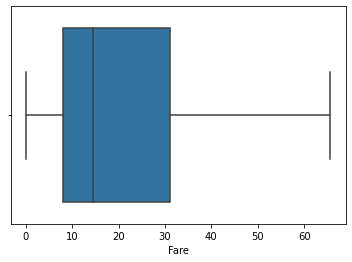

In [46]:
sns.boxplot(df['Fare'])

C:\Users\sadiy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

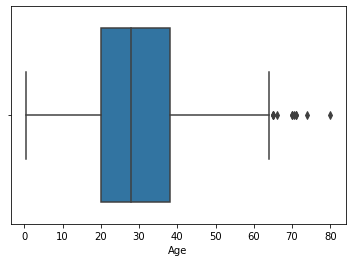

In [47]:
sns.boxplot(df['Age'])

In [48]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['Age'] = np.where(df['Age']>u_e,u_e,np.where(df['Age']<l_e,l_e,df['Age']))

C:\Users\sadiy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

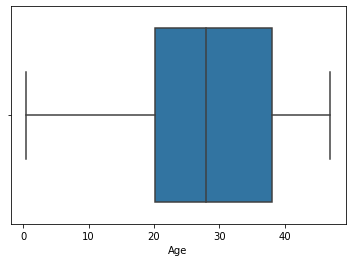

In [49]:
sns.boxplot(df['Age'])

C:\Users\sadiy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

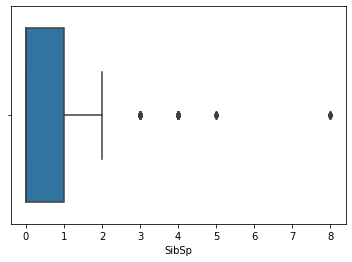

In [51]:
sns.boxplot(df['SibSp'])

In [53]:
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['SibSp'] = np.where(df['SibSp']>u_e,u_e,np.where(df['SibSp']<l_e,l_e,df['SibSp']))

C:\Users\sadiy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

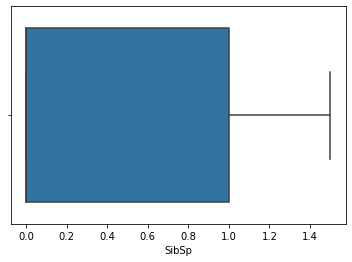

In [54]:
sns.boxplot(df['SibSp'])

C:\Users\sadiy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

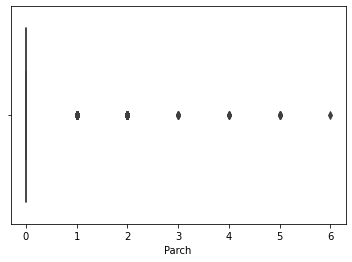

In [55]:
sns.boxplot(df['Parch'])

In [46]:
Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['Parch'] = np.where(df['Parch']>u_e,u_e,np.where(df['Parch']<l_e,l_e,df['Parch']))

<Axes: >

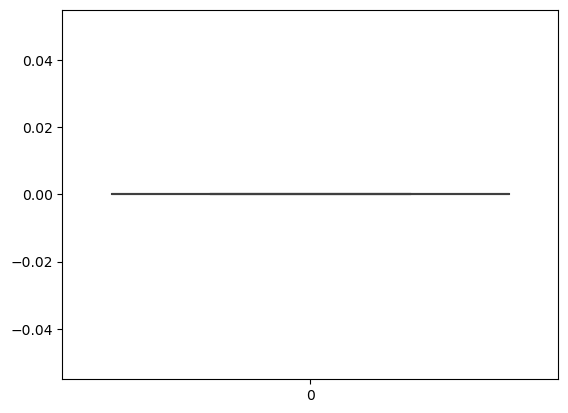

In [47]:
sns.boxplot(df['Parch'])

<Axes: >

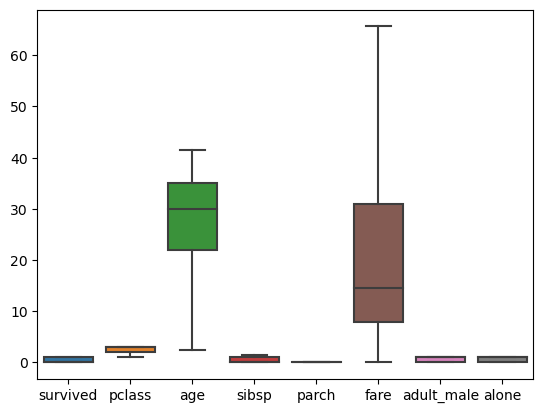

In [48]:
sns.boxplot(df)  #No more outliers

# Q7. Check for Categorical columns and perform encoding.


In [58]:
LE = LabelEncoder()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [61]:
df['Sex'] = LE.fit_transform(df['Sex'])
df['Embarked'] = LE.fit_transform(df['Embarked'])
df['Pclass'] = LE.fit_transform(df['Pclass'])

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1.0,0.0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1.0,0.0,65.6344,0,0,2,0,0,1,0
2,1,3,0,26.0,0.0,0.0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1.0,0.0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0.0,0.0,8.0500,2,2,1,1,2,0,1


# Q8. Split the data into dependent and independent variables.


In [62]:
y = df['Survived']
x = df.drop(columns=['Survived'])

In [63]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,NaN,2
1,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,0
2,3,2,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,2
4,5,2,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,NaN,2


In [64]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Q9. Scale the independent variables


In [67]:
name = x.columns
SS = StandardScaler()
z = SS.fit_transform(x)
x = pd.DataFrame(z,columns=name)
x


# Q10. Split the data into training and testing

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [69]:
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,2,"Boulos, Mrs. Joseph (Sultana)",0,NaN,0.0,2,2678,15.2458,NaN,0
439,440,1,"Kvillner, Mr. Johan Henrik Johannesson",1,31.0000,0.0,0,C.A. 18723,10.5000,NaN,2
817,818,1,"Mallet, Mr. Albert",1,31.0000,1.0,1,S.C./PARIS 2079,37.0042,NaN,0
378,379,2,"Betros, Mr. Tannous",1,20.0000,0.0,0,2648,4.0125,NaN,0
491,492,2,"Windelov, Mr. Einar",1,21.0000,0.0,0,SOTON/OQ 3101317,7.2500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
835,836,0,"Compton, Miss. Sara Rebecca",0,39.0000,1.0,1,PC 17756,65.6344,E49,0
192,193,2,"Andersen-Jensen, Miss. Carla Christine Nielsine",0,19.0000,1.0,0,350046,7.8542,NaN,2
629,630,2,"O'Connell, Mr. Patrick D",1,NaN,0.0,0,334912,7.7333,NaN,1
559,560,2,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",0,36.0000,1.0,0,345572,17.4000,NaN,2


In [70]:
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,2,"Yousseff, Mr. Gerious",1,NaN,0.0,0,2627,14.4583,NaN,0
648,649,2,"Willey, Mr. Edward",1,NaN,0.0,0,S.O./P.P. 751,7.5500,NaN,2
278,279,2,"Rice, Master. Eric",1,7.0,1.5,1,382652,29.1250,NaN,1
31,32,0,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,1.0,0,PC 17569,65.6344,B78,0
255,256,2,"Touma, Mrs. Darwis (Hanne Youssef Razi)",0,29.0,0.0,2,2650,15.2458,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
780,781,2,"Ayoub, Miss. Banoura",0,13.0,0.0,0,2687,7.2292,NaN,0
837,838,2,"Sirota, Mr. Maurice",1,NaN,0.0,0,392092,8.0500,NaN,2
215,216,0,"Newell, Miss. Madeleine",0,31.0,1.0,0,35273,65.6344,D36,0
833,834,2,"Augustsson, Mr. Albert",1,23.0,0.0,0,347468,7.8542,NaN,2


In [71]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [72]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64